In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


print(tf.__version__)

2.11.0


In [2]:
data=tf.keras.datasets.fashion_mnist

In [3]:
data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\tanta\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(xtrain,ytrain),(xtest,ytest)=data.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
len(ytrain)

60000

In [8]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

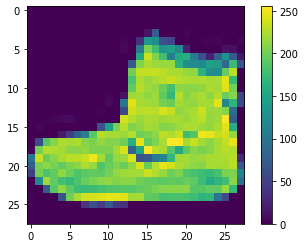

In [9]:
plt.figure()
plt.imshow(xtrain[0])
plt.grid(False)
plt.colorbar()
plt.show()

In [10]:
xtrain=xtrain/255.0
xtest=xtest/255.0

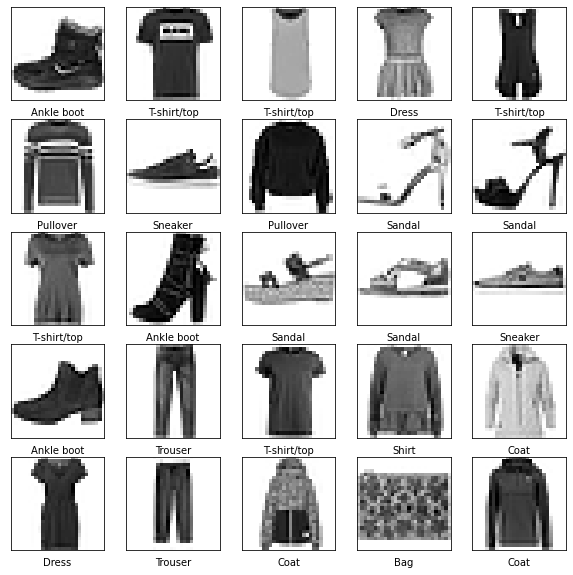

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[ytrain[i]])
plt.show()

In [12]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4942 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3351 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2683 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [16]:
test_loss, test_acc = model.evaluate(xtest,ytest, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3374 - accuracy: 0.8831 - 558ms/epoch - 2ms/step

Test accuracy: 0.8830999732017517


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [19]:
predictions[0]

array([2.02932715e-05, 8.34371572e-10, 1.76206515e-06, 1.14773755e-08,
       3.16230171e-07, 3.13397701e-04, 6.68507069e-04, 2.82984860e-02,
       2.24781374e-07, 9.70696986e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
ytest[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

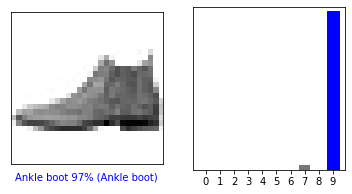

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  ytest)
plt.show()

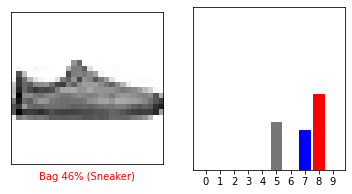

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  ytest)
plt.show()

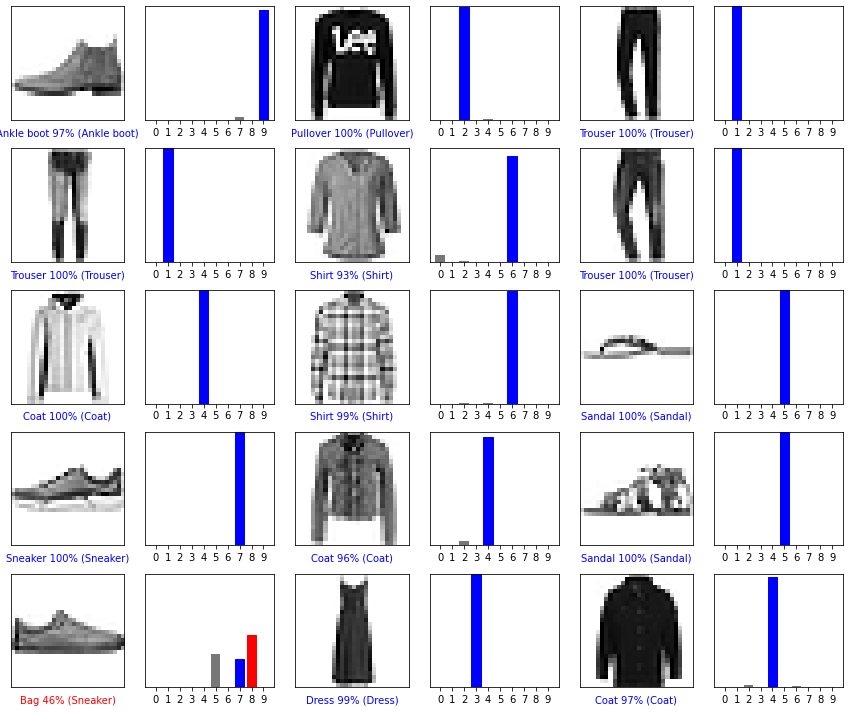

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], ytest)
plt.tight_layout()
plt.show()

In [28]:
img = xtest[1]

print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[3.9007864e-05 1.4680912e-15 9.9553007e-01 2.9955573e-11 4.2486214e-03
  2.1201071e-16 1.8227962e-04 5.4766372e-15 1.0275658e-09 3.2143306e-17]]


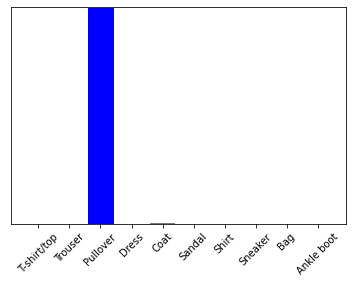

In [31]:
plot_value_array(1, predictions_single[0], ytest)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2